# **PHYS 481 - Computational Physics II**

## **Assignment #5 - Monte Carlo Methods**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a5_scottsalmon

### **DATES:** 2024/10/15 - 2024/10/17

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1: [8 pts]

Andrew and Barbara are playing a game, in which 15 boxes are arranged in a grid as shown below.

<img src="game grid.png">


Prizes are put into two (2) randomly chosen boxes. Andrew will search the boxes row by row, so his search order is ABCDEFGHIJKLMNO. 
Barbara will search column by column, so her order is AFKBGLCHMDINEJO. 

Andrew and Barbara open their boxes together on each turn; that is, on the first turn they both open A, on the second Andrew opens B 
while Barbara opens F, and so on.

Who is more likely to find a prize first? Or are they both equally likely? [Question: Timothy
Chow, reprinted in The Guardian, 2024]


### a.  Take a guess. (No points, just for fun. It’s not very intuitive.)

 - I'm going to be boring and say that their likelihood of winning is going to be about 50%. If the prize is truly placed randomly, then every single time they open a box (regardless of order) they will have the same probability of opening the box with a prize in it. Therefore, they will both have an equal chance.


### b. [4 pts] Write a Python code to simulate running the experiment at least 100 000 times. Find the 3 probabilities (i.e. Andrew wins, Barbara wins, or tie) with uncertainty estimates. Report your results as a table.

In [18]:
def q1b(value):

    '''Function used to solve question 1b. Takes in a iteration count value as a parameter.'''

    #initializing game grids for player 1 and player 2.
    player_1 = np.array( [[0,1,2,3,4], [5,6,7,8,9], [10,11,12,13,14]])
    player_2 = np.transpose(player_1)
    player_1, player_2 = player_1.flatten(), player_2.flatten()
    
    #initializing counter variables
    tie_count, player_1_count, player_2_count = 0, 0, 0
    
    #looping 0-iteration number
    for j in range(0,value):
        
        #selecting prize locations from 0-14
        prize_1 = np.random.randint(0,15,1)
        prize_2 = np.random.randint(0,15,1)

        #checks prize locaations and rerolls prize 2 if its the same as prize 1
        while prize_1 == prize_2:
            prize_2 = np.random.randint(0,15,1)
            
        #initializes prize array and win condition booleans
        prize = np.array([prize_1, prize_2])
        winner, andrew_win, barbara_win = False, False, False
        
        #loops until somebody wins
        i = 0
        while(winner == False):
            
            #checks if andrew won each turn
            if player_1[i] == prize[0] or player_1[i] == prize[1]:
                andrew_win = True

            #checks if barbara won each turn 
            if player_2[i] == prize[0] or player_2[i] == prize[1]:
                barbara_win = True
            
            #checks if either of them won
            if andrew_win == True or barbara_win == True:
                winner = True
                
                #if both won, add to the tie counter
                if andrew_win == True and barbara_win == True:
                    tie_count += 1
                
                #else, if andrew one, add to his counter
                elif andrew_win == True:
                    player_1_count += 1
                
                #else, if barbara won, add to her counter
                elif barbara_win == True:
                    player_2_count += 1
            i += 1

    #calculates decimal probability values
    player_1_prob = player_1_count/value
    player_2_prob = player_2_count/value
    tie_prob = tie_count/value
    
    #calculates uncertainty, converts it to a percentage
    #u = sqrt( [p(1-p)] / N)
    unc_player_1 = np.sqrt( (player_1_prob*(1-player_1_prob)) / value ) * 100
    unc_player_2 = np.sqrt( (player_2_prob*(1-player_2_prob)) / value ) * 100
    unc_tie = np.sqrt( (tie_prob*(1-tie_prob)) / value ) * 100
    
    #converts probability to percentages
    player_1_perc = player_1_prob*100
    player_2_perc = player_2_prob*100
    tie_perc = tie_prob*100
    
    #print statement
    print("Andrew won about %0.1f%% +/- %0.1f%% of the games, Barbara won about %0.1f%% +/- %0.1f%% of the games, and %0.1f%% +/- %0.1f%% of the games ended in a tie.\
        "%(player_1_perc, unc_player_1, player_2_perc, unc_player_2, tie_perc, unc_tie))
    
q1b(100000)


Andrew won about 41.0% +/- 0.2% of the games, Barbara won about 37.2% +/- 0.2% of the games, and 21.8% +/- 0.1% of the games ended in a tie.        


The print statement above will be whatever was the most recent simulation. The table below might not perfectly align with the statement because the winning % will be slightly different every time we run the code.

|             | Andrew      | Barbara     | Tie       |
| ----------- | ----------- | ----------- |----------- |
| Winning %   | 41.0%       | 37.2%       | 21.8%      |
| Uncertainty +/- %  | 0.2%    | 0.2%    | 0.1%   |

Uncertainty is calculated using one standard deviation.

### c. [4 pts] There is a finite number of possible games (i.e. possible ways the prizes can be distributed). Simulate them all to find the exact odds of the 3 outcomes. Report your results as a table.

In [19]:
def q1c():
    
    '''Function used to solve question 1c. No parameters required.'''

    #initializing game grids for player 1 and player 2.
    player_1 = np.array( [[0,1,2,3,4], [5,6,7,8,9], [10,11,12,13,14]])
    player_2 = np.transpose(player_1)
    player_1, player_2 = player_1.flatten(), player_2.flatten()
    
    #initializing counter variables
    tie_count, player_1_count, player_2_count = 0, 0, 0
    counter = 0

    #loop sets the first prize to 0-14 each time its iterated
    for j in range(0,15):
        #loop sets the  second prize to 0-14 each time its iterated
        for k in range(0,15):
            
            #if prize is in same spot for both, skip this iteration
            if j == k:
                continue
            
            else:
                #sets prize array and initializes boolean win conditions
                prize = [j,k]
                winner, player_1_win, player_2_win = False, False, False
                
                #loops until somebody wins
                i = 0
                while(winner == False):
                    
                    #checks if andrew won each turn
                    if player_1[i] == prize[0] or player_1[i] == prize[1]:
                        player_1_win = True

                    #checks f barbara won each turn 
                    if player_2[i] == prize[0] or player_2[i] == prize[1]:
                        player_2_win = True
                    
                    #checks if either of them won
                    if player_1_win == True or player_2_win == True:
                        winner = True
                        
                        #if both won, add to the tie counter
                        if player_1_win == True and player_2_win == True:
                            tie_count += 1
                        
                        #else, if andrew one, add to his counter
                        elif player_1_win == True:
                            player_1_count += 1
                        
                        #else, if barbara won, add to her counter
                        elif player_2_win == True:
                            player_2_count += 1
                    i += 1
                
                #counter variable is to track how many possible games there are
                counter += 1

    #calculates probabilities and converts them to percentages.
    player_1_perc = player_1_count/counter*100
    player_2_perc = player_2_count/counter*100
    tie_perc = tie_count/counter*100
    
    #print statements
    print("The total amount of possible games is: %i\n"%counter)
    print("Andrew wins exactly %0.3f%% of the games, Barbara wins exactly %0.3f%% of the games, and %0.3f%% of the games end in a tie."%(player_1_perc, player_2_perc, tie_perc))
    
q1c()

The total amount of possible games is: 210

Andrew wins exactly 40.952% of the games, Barbara wins exactly 37.143% of the games, and 21.905% of the games end in a tie.


Unlike before in q1b, there are no uncertainty in these results since instead of simulating 100k games of random assortments and finding approximate winning percentage values, we simulated every game possible and found the exact winning percentage values.

|             | Andrew      | Barbara     | Tie       |
| ----------- | ----------- | ----------- |-----------|
| Winning %   | 40.952%     | 37.143%     | 21.905%   |


### Question 2: [4 pts]

Use Monte Carlo sampling to estimate the value of the following definite integral:

$$\int_0^{0.5} sin(e^{3x^2+1}) dx$$


Solve to at least 3 significant figures and give the uncertainty in your answer. Report your results clearly (the TA must be able to clearly tell what your final answer is; don’t just bury it somewhere in your code).

[NOTE: Monte Carlo methods are not efficient for simple 1d integrals like this. The point of this question is to set up techniques for more complicated problems.]

In [20]:
def q2(a,b,N):
    
    '''Function that solves integral in question 2. Takes in the integration bounds for and b, and an integer amount of desired iterations for N.'''

    #creates array of N points from a to b in random positions. Then puts those points into f(x). Then uses this to calculate integral.
    x = np.random.uniform(a,b,N)
    x_i = np.sin(np.exp(3*x**2+1))
    I = (b-a)/N * np.sum(x_i)

    #calculates standard deviation of the calculated function points to find sigma. Then uses sigma to get uncertainty.
    sigma = np.std(x_i)
    uncertainty = (sigma * (b-a)) / np.sqrt(N)

    #print statement.
    print("After using a Monte Carlo sampling method, the estimated value for the given integral is about %0.4f +/- %0.4f."%(I, uncertainty))

#setting N to 1 million
q2(0, 0.5, int(1e6)) 

After using a Monte Carlo sampling method, the estimated value for the given integral is about -0.1117 +/- 0.0003.


### Question 3: [8 pts]

Use Monte Carlo sampling to estimate the volume of a unit hypersphere of dimension 𝑛 up to 𝑛 =15. Plot the volume versus 𝑛 including 2𝜎 error bars and include the analytic result on the plot. The analytic result in recursive form is:

$$
V_n =
\begin{cases}
1 & \text{if } n = 0 \\
2 & \text{if } n = 1 \\
\frac{2\pi}{n} V_{n-2} & \text{otherwise}
\end{cases}
$$


Choose the number of Monte Carlo iterations for each simulation so that the error bars are small but at least some are visible on the graph.

Loop Progess: 0.0% (Iteration number = 0)
Loop Progess: 6.7% (Iteration number = 1)
Loop Progess: 13.3% (Iteration number = 2)
Loop Progess: 20.0% (Iteration number = 3)
Loop Progess: 26.7% (Iteration number = 4)
Loop Progess: 33.3% (Iteration number = 5)
Loop Progess: 40.0% (Iteration number = 6)
Loop Progess: 46.7% (Iteration number = 7)
Loop Progess: 53.3% (Iteration number = 8)
Loop Progess: 60.0% (Iteration number = 9)
Loop Progess: 66.7% (Iteration number = 10)
Loop Progess: 73.3% (Iteration number = 11)
Loop Progess: 80.0% (Iteration number = 12)
Loop Progess: 86.7% (Iteration number = 13)
Loop Progess: 93.3% (Iteration number = 14)
Loop Progess: 100.0% (Iteration number = 15)


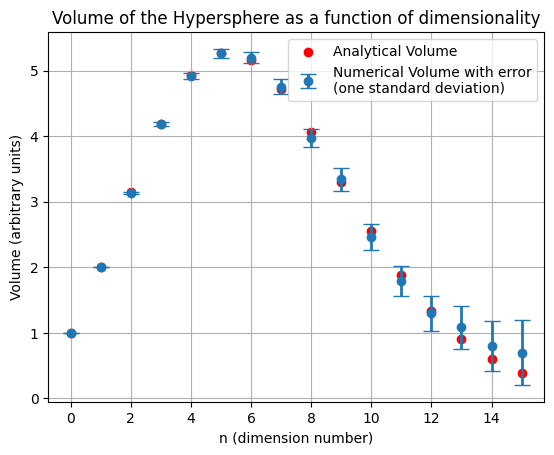

In [21]:
def analytic():

    '''This function calculates the analytic solution for the volume of a hypersphere.'''

    #initializes volume array and sets n=0 and n=1
    v = np.array([1, 2])

    #for n=2 to n=15, loop.
    for n in range(2,16):

        #v_n = given function, then add to volume list.
        v_n = 2*np.pi * v[n-2] / n
        v = np.append(v, v_n)
    return v

def monte_carlo():

    #initializing storage arrays
    v = np.array([])
    u = np.array([])

    #loops from n=0 to n=15
    for n in range(0,16):
        #set number of iterations, scaling with the number of dimensions
        iterations = 100 + 25000 * n 
        count_inside = 0
        for i in range(iterations):
            
            #this makes a point of n dimensions with each value being between -1 and 1. so say n = 6, then the point will have an x,y,z,a,b,c coordinate system, and all 
            #of those coordinates will be between -1 and 1.
            point = np.random.uniform(-1, 1, n)
            
            #say n=3, then this is saying if x^2 + y^2 + z^2 <=1, then the point is inside the hypersphere. Otherwise, its not.
            if np.sum(point**2) <= 1:
                count_inside += 1
        
        #2^n is the volume of a hypercube, if we multiply the ratio of the points inside/total points with this volume then we will get volume of hypersphere
        estimated_volume = (count_inside / iterations) * 2**n
        
        p = count_inside / iterations
        two_sigma = 2 * np.sqrt(p * (1 - p) / iterations) * 2**n  # Standard error
        
        #adds calculated values to volume and uncertainty lists
        v = np.append(v, estimated_volume)
        u = np.append(u, two_sigma)
        
        #loop progress print statement because this algorithm takes awhile
        print("Loop Progess: %0.1f%% (Iteration number = %i)"%(n/15*100, n))
        
    return v, u

#getting our analytic and calculated y values
y1 = analytic()
y2, u2 = monte_carlo()

#plotting instructions
plt.figure()
plt.scatter(range(0,16), y1, color = 'red', label='Analytical Volume')
plt.errorbar(range(0,16), y2, u2, fmt='o', linewidth=2, capsize=6, label="Numerical Volume with error\n(one standard deviation)")
plt.legend(loc = 'upper right')
plt.title("Volume of the Hypersphere as a function of dimensionality")
plt.xlabel('n (dimension number)')
plt.ylabel('Volume (arbitrary units)')
plt.grid('True')


### Question 4: [9 pts]

Define the radius 𝑟 in 𝑛 dimensions as $$r = \sqrt{ \sum^n_{i=1} x_i^2 } $$


a. [4 pts] Calculate the integral $\int 𝑟(𝑥_𝑖)𝑑^𝑛𝑥$ over the unit hypercube (extending from 0 to 1 in each dimension) in 3, 4, 10 and 100 dimensions using a simple Monte Carlo integration. Report the standard uncertainty for each estimate, and make sure it’s less than 0.1% of the value. Display your results as a table.

In [22]:
def q4(n, points, max_volume):
    
    '''Function takes in a dimension number, the desired amount of points, and the maximum volume of the hypercube. it outputs the result of the integral.'''

    #makes array that is n*points long filled with random values, scaled by maximum volume
    samples = np.random.rand(n*points)*max_volume
    
    #reshapes array to make n rows and points columns, and fills it with samples sequentially
    #so for example, samples[6] before is now samples[0][6]. similarily, samples[-1] = samples[2][-1] for n = 3.
    samples = np.reshape(samples,(n,points))

    #calculates r(x_i) using new samples array. Axis=0 means values are being summed via column
    #so for example np.sum([[1,2,3], [4,5,6],[7,8,9]], axis=0) = [ (1+4+7), (2+5+8), (3+6+9)] = [12, 15, 18]
    r = np.sqrt(np.sum(samples**2, axis=0))

    #calculates integral and uncertainty
    volume = max_volume**n
    integral = np.mean(r) * volume
    uncertainty = np.std(r)/np.sqrt(points) * volume

    return integral,uncertainty

#sets points to 1 million to ensure less then 0.1% uncertainty
points=int(1e6)

#calls function q4 for various dimensions.
for n in [3, 4, 10, 100]:
    integral,uncertainty = q4(n, points, 1.0)
    print("The integral in %i dimensions is equal to %0.4f +/- %0.4f."%(n, integral, uncertainty))

The integral in 3 dimensions is equal to 0.9608 +/- 0.0003.
The integral in 4 dimensions is equal to 1.1218 +/- 0.0003.
The integral in 10 dimensions is equal to 1.8066 +/- 0.0003.
The integral in 100 dimensions is equal to 5.7675 +/- 0.0003.


| Dimension number | Integral value |
|-----------------|----------|
| 3 | 0.9600 +/- 0.0003 |
| 4 | 1.1222 +/- 0.0003 |
| 10 | 1.8067 +/- 0.0003 |
| 100 | 5.7676 +/- 0.0003|

Uncertainty is calculated using one standard deviation.

### b. [4 pts] Repeat part a over the cube extending from 0 to 2 in each dimension.

In [23]:
#calls function q4 for various dimensions. adjusted the maximum volume to 2.0.
for n in [3,4,10,100]:

    integral,uncertainty = q4(n,points, 2.0)

    #if statement changes print statement to exponential format when it becomes very big.
    if integral < 5000:
        print("The integral in %i dimensions is equal to %0.4f +/- %0.4f."%(n, integral, uncertainty))
    else:
        print("The integral in %i dimensions is equal to %0.5e +/- %0.1e."%(n, integral, uncertainty))

The integral in 3 dimensions is equal to 15.3665 +/- 0.0044.
The integral in 4 dimensions is equal to 35.8964 +/- 0.0088.
The integral in 10 dimensions is equal to 3700.3222 +/- 0.5406.
The integral in 100 dimensions is equal to 1.46223e+31 +/- 6.6e+26.


| Dimension number | Integral value |
|-----------------|----------|
| 3 | 15.370 +/- 0.004 |
| 4 | 35.894 +/- 0.009 |
| 10 | 3700.2 +/- 0.5 |
| 100 | (1.46231 +/- 0.00007) * $10^{31}$ |

Uncertainty is calculated using one standard deviation.

### c. [1 pt] If you tried to do part a using a more conventional numerical integration scheme (e.g.rectangle rule or midpoint rule) sampled on a regular grid, what problem would you run into?

- You could probably try for 3rd or 4th dimension, but good luck figuring out the coefficients for a midpoint method for a much higher dimension like 10 (let alone 100). It'd also require a ton of memory to do a conventional integration scheme, because you'd be simulating an unfathomable amount of points compared to a monte carlo sampling method.